In [1]:
#----------------------------------
#Importing Libraries
#----------------------------------
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from basic_functions import read_csv, get_outliers, column_name_replace_space,constrain_dataset,is_null
from missing_value_functions import fill_employment_percentage,fill_labor_force_participation

In [2]:
#----------------------------------
#Load Datasets 
#----------------------------------
df_ratio_labor = read_csv('data/3-ratio-of-female-to-male-labor-force-participation-rates-ilo-wdi.csv')
df_labor_female = read_csv('data\Labour-Force-Participation-Female.csv')
df_labor_male = read_csv('data\Labour-Force-Participation-Male.csv')

## Extra Datsets
df_hdi= read_csv('data\human-development-index-(hdi)-by-country-2024.csv')
df_female_employmennt = read_csv('data/female-employment-to-population-ratio.csv')
df_share_of_male_female_employment = read_csv('data\share-of-male-vs-female-employment-in-industry.csv')


In [3]:
# Changing column names for readability
df_ratio_labor = df_ratio_labor.rename(columns={"Ratio of female to male labor force participation rate (%) (modeled ILO estimate)": "ratio_of_f_to_m_labor_force_participation_rate"})
df_labor_male.columns =[col.replace(r"Labour force participation rate, male (% ages 15 and older) ","") for col in df_labor_male.columns]
df_labor_female.columns =[col.replace(r"Labour force participation rate, female (% ages 15 and older) ","") for col in df_labor_female.columns]
df_female_employmennt = df_female_employmennt.rename(columns={"Employment to population ratio, 15+, female (%) (national estimate)": "ratio_of_female_employment_to_population"})
df_share_of_male_female_employment = df_share_of_male_female_employment.rename(columns={
    "Employment in industry, male (% of male employment) (modeled ILO estimate)": "employement_percentage_male",
    "Employment in industry, female (% of female employment) (modeled ILO estimate)": "employement_percentage_female"
    
    })


## Constrain Dataset

- HDI Rank Very High-High, Between 1980 - Today



In [4]:
df_hdi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189 entries, 0 to 188
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   country  189 non-null    object 
 1   HdiTier  188 non-null    object 
 2   Hdi2021  189 non-null    float64
 3   Hdi2020  189 non-null    float64
 4   Hdi2019  189 non-null    float64
 5   Hdi2010  187 non-null    float64
dtypes: float64(4), object(2)
memory usage: 9.0+ KB


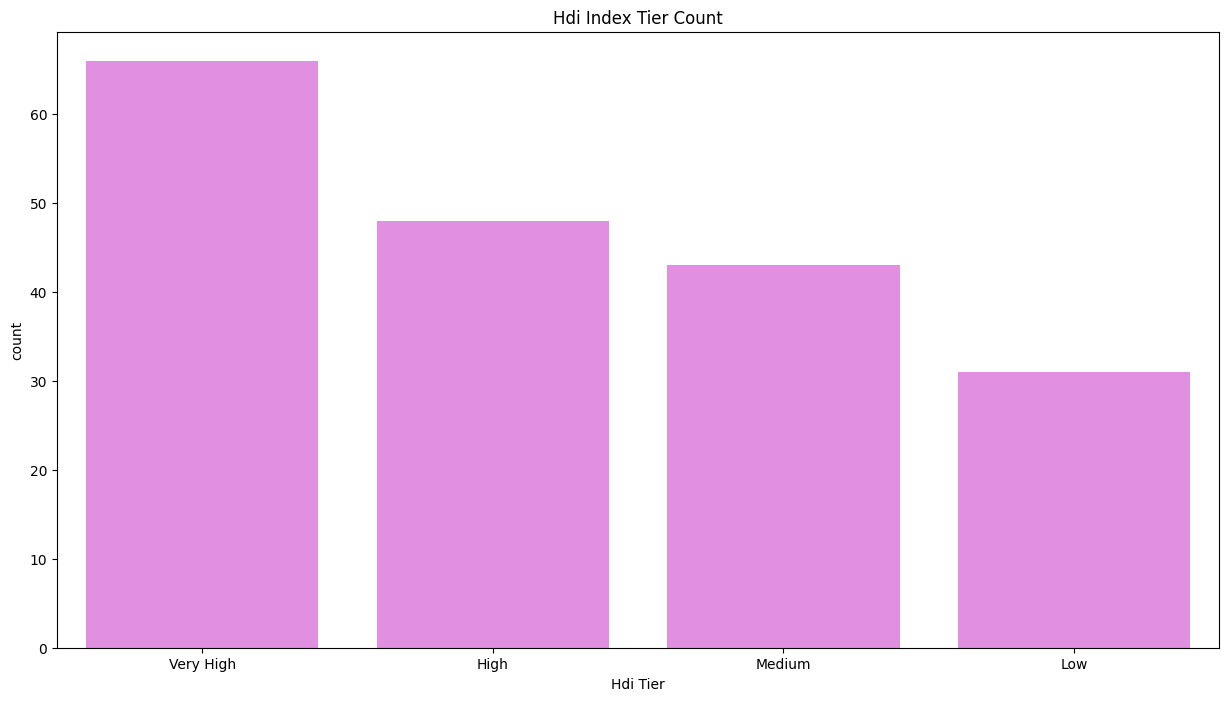

In [5]:
# We limited dataset to high and very high HDI index
#> 0.80 -> Very High
#> 0.70 -> High
#> 0.60 -> Medium
#> 0.50 -> Low
plt.figure(figsize=(15,8))
plt.title('Hdi Index Tier Count')
plt.xlabel('Hdi Tier')
sns.countplot(x=df_hdi['HdiTier'], color='violet', orient='v', order = ['Very High', 'High', 'Medium', 'Low'])
plt.show()

In [6]:
# 114 Countries in selected countries
df_hdi[(df_hdi['HdiTier']=='Very High') | (df_hdi['HdiTier']=='High')].describe()

,Hdi2021,Hdi2020,Hdi2019,Hdi2010
count,114.000000,114.000000,114.000000,113.000000
mean,0.824289,0.824509,0.831500,0.797168
std,0.079738,0.077661,0.076197,0.079302
min,0.703000,0.703000,0.703000,0.656000
25%,0.758250,0.757250,0.768750,0.728000
50%,0.809500,0.815500,0.819000,0.788000
75%,0.895750,0.893500,0.897000,0.868000
max,0.962000,0.959000,0.962000,0.942000


In [7]:
selected_countries = df_hdi[(df_hdi['HdiTier']=='Very High') | (df_hdi['HdiTier']=='High')]['country']

In [8]:
# Getting the constrained dataset
df_ratio_labor = constrain_dataset(df_ratio_labor,selected_countries)
df_female_employmennt = constrain_dataset(df_female_employmennt,selected_countries)
df_share_of_male_female_employment = constrain_dataset(df_share_of_male_female_employment,selected_countries)


### Female - Male Labor Force Participation and Employment Datasets

### 1. Labor Participation (Female and Male) 

- The labor force is the number of people who are employed plus the unemployed who are looking for work.

- Labor Force Participation Rate: It indicates the percentage of people who are either currently employed or are unemployed but actively looking for work.

- The labor force participation rate is the proportion of the population aged 15 years and older that is economically active.

- This ratio is calculated by dividing the labor force participation rate among women, by the corresponding rate for men.


- Female to Male Ratio: The ratio of female to male labor force participation rate calculates the proportion of females participating in the labor force relative to males.

- If the ratio is greater than 100, it indicates that a higher proportion of females are participating in the labor force compared to males. This might suggest a higher level of gender equality or a greater need for females to contribute to the labor force in that particular context.

- If the ratio is less than 100, it indicates that a lower proportion of females are participating in the labor force compared to males. This could suggest gender disparities or cultural, social, or economic factors that limit female participation in the labor force.

- If the ratio is equal to 100, it suggests that there is gender parity in labor force participation, meaning that the proportions of females and males participating in the labor force are equal.

- Hemisphere: This column categorizes countries based on their geographical hemispheres, such as "Northern Hemisphere" or "Southern Hemisphere."

- HDI Rank (2021): This column represents the Human Development Index (HDI) rank of each country for the year 2021.The HDI is a composite index measuring average achievement in three basic dimensions of human development: health (life expectancy at birth), education (mean years of schooling and expected years of schooling), and standard of living (gross national income per capita). The HDI is the geometric mean of normalized indices for each of the three dimensions. A country scores a higher level of HDI when the lifespan is higher, the education level is higher, and the gross national income GNI (PPP) per capita is higher.A lower rank indicates higher human development.

In [9]:
df_ratio_labor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3296 entries, 0 to 3295
Data columns (total 4 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Entity                                          3296 non-null   object 
 1   Code                                            3296 non-null   object 
 2   Year                                            3296 non-null   int64  
 3   ratio_of_f_to_m_labor_force_participation_rate  3296 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 103.1+ KB


In [10]:
df_ratio_labor.head()

,Entity,Code,Year,ratio_of_f_to_m_labor_force_participation_rate
0,Albania,ALB,1990,70.837120
1,Albania,ALB,1991,72.830475
2,Albania,ALB,1992,73.305390
3,Albania,ALB,1993,72.635666
4,Albania,ALB,1994,72.074180


In [11]:
# Checking null values
# No null values in the important columns
is_null(df_ratio_labor)

Entity                                            0
Code                                              0
Year                                              0
ratio_of_f_to_m_labor_force_participation_rate    0
dtype: int64

In [12]:
# Checking outliers
# No outliers
get_outliers(df_ratio_labor,'ratio_of_f_to_m_labor_force_participation_rate')


Series([], Name: ratio_of_f_to_m_labor_force_participation_rate, dtype: float64)

In [13]:
# Year between 1990-2021
# The ratio percentange smaller than 100 male labor participation higher than females
# Even the maximum rate lower than hundred which means participation rate not equal
df_ratio_labor.describe()

,Year,ratio_of_f_to_m_labor_force_participation_rate
count,3296.000000,3296.000000
mean,2005.500000,66.984666
std,9.234494,17.245998
min,1990.000000,12.230471
25%,1997.750000,57.366708
50%,2005.500000,70.829072
75%,2013.250000,80.555900
max,2021.000000,94.658910


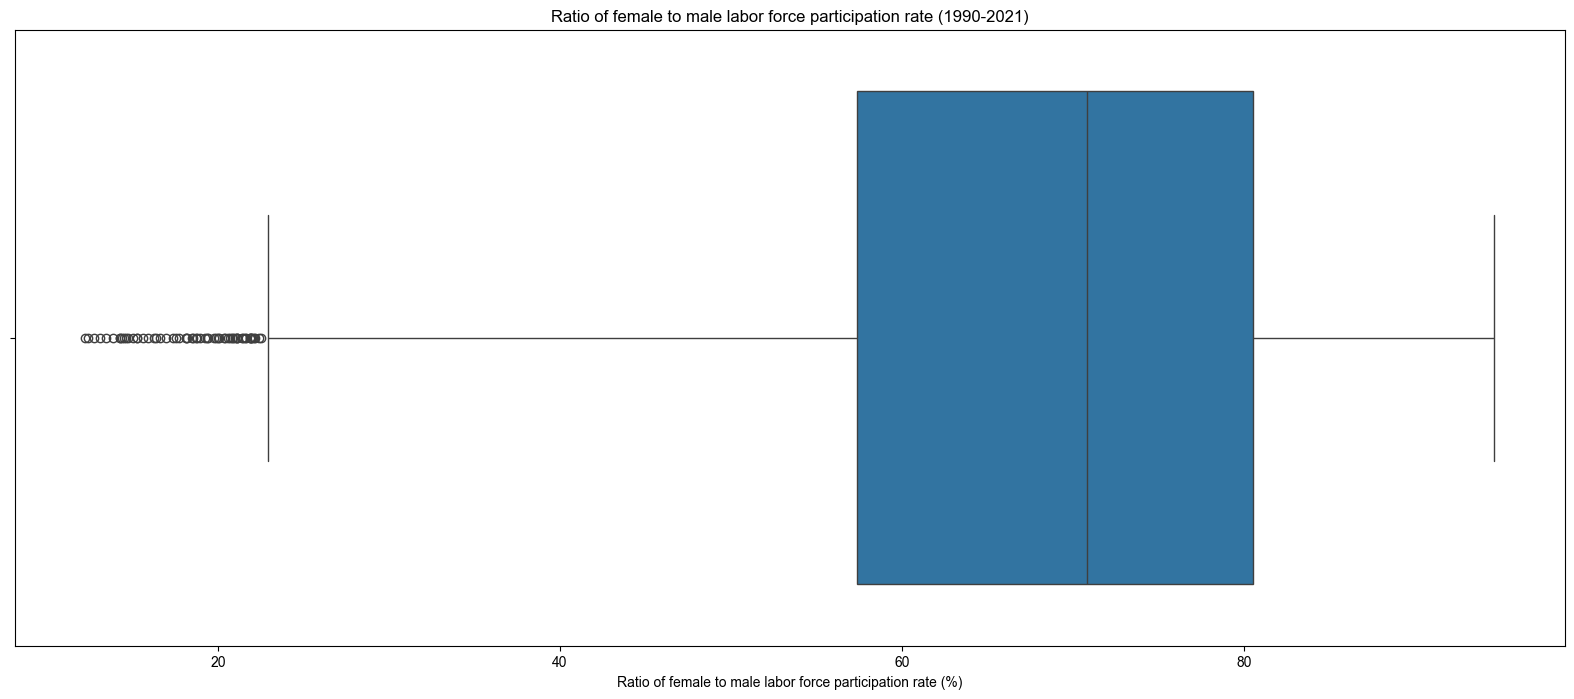

In [14]:
# Most of the data has about 58-80 ratio
# For every hundered men 58-80 women participating labor force
# We can see there is so little data that female participation equal or higher than male participation
plt.figure(figsize=(20,8))
plt.title('Ratio of female to male labor force participation rate (1990-2021)')
plt.xlabel('Ratio of female to male labor force participation rate (%)')
sns.set_theme(style="darkgrid")
sns.boxplot(df_ratio_labor['ratio_of_f_to_m_labor_force_participation_rate'],orient='h')
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_15452\1918039935.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_ratio_labor.query('ratio_of_f_to_m_labor_force_participation_rate < 40 ').sort_values(by = ['ratio_of_f_to_m_labor_force_participation_rate'],ascending=True), y="Entity", x="ratio_of_f_to_m_labor_force_participation_rate",palette='dark'


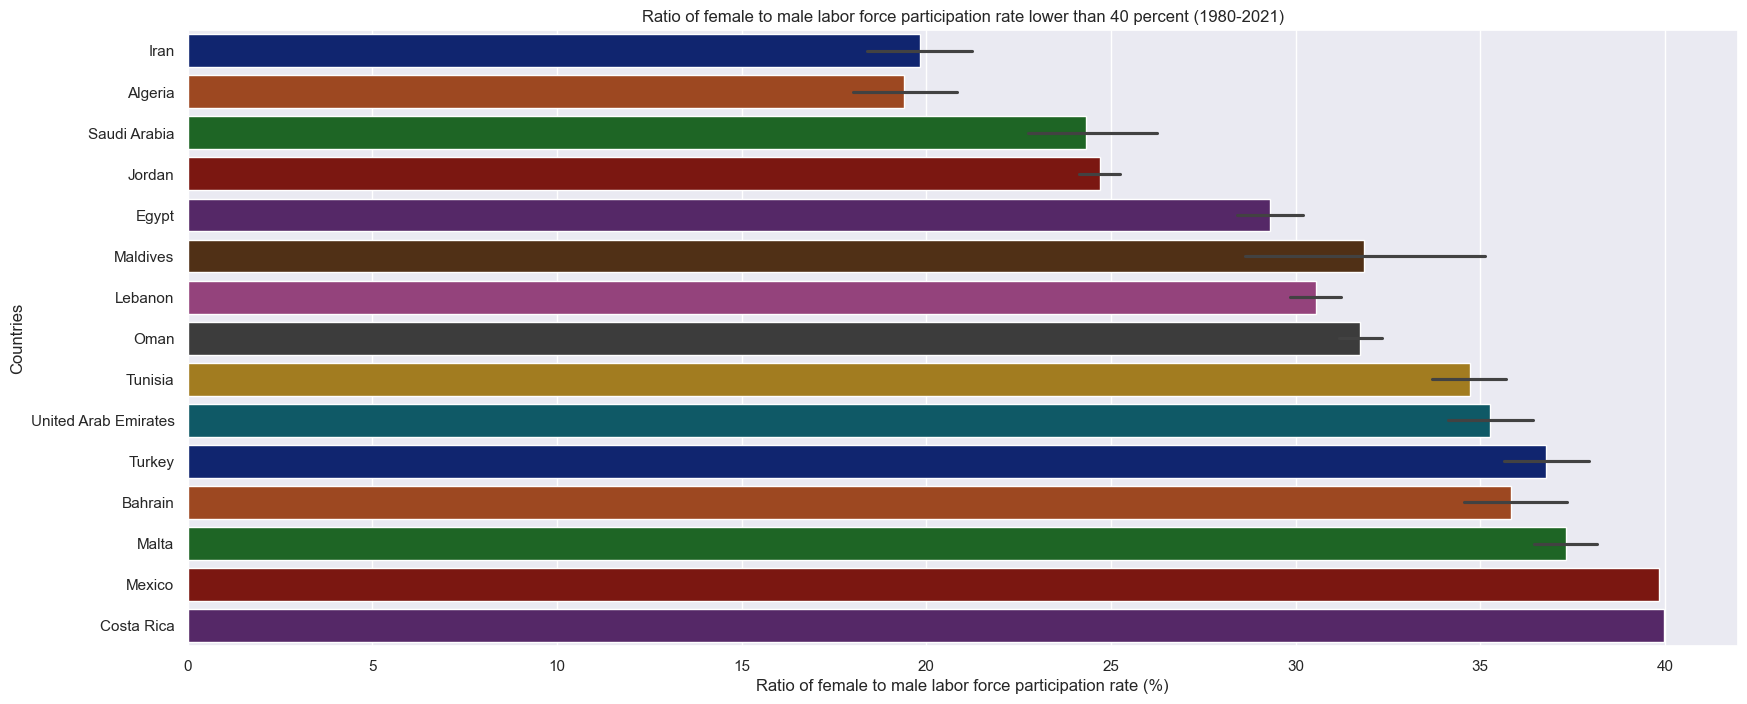

In [15]:
# The countries labor force participation female to male ratio is the least
# Turkey is one of them
# Iran, Algeria and Saudi Arabia has the least amount
plt.figure(figsize=(20,8))
plt.title('Ratio of female to male labor force participation rate lower than 40 percent (1980-2021)')
plt.xlabel('Ratio of female to male labor force participation rate (%)')
plt.ylabel('Countries')
sns.barplot(data=df_ratio_labor.query('ratio_of_f_to_m_labor_force_participation_rate < 40 ').sort_values(by = ['ratio_of_f_to_m_labor_force_participation_rate'],ascending=True), y="Entity", x="ratio_of_f_to_m_labor_force_participation_rate",palette='dark'
            ,orient='h'
            
)
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_15452\1213956215.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_ratio_labor.query('ratio_of_f_to_m_labor_force_participation_rate > 90').sort_values(by = ['ratio_of_f_to_m_labor_force_participation_rate'],ascending=False), y="Entity", x="ratio_of_f_to_m_labor_force_participation_rate",palette='dark'


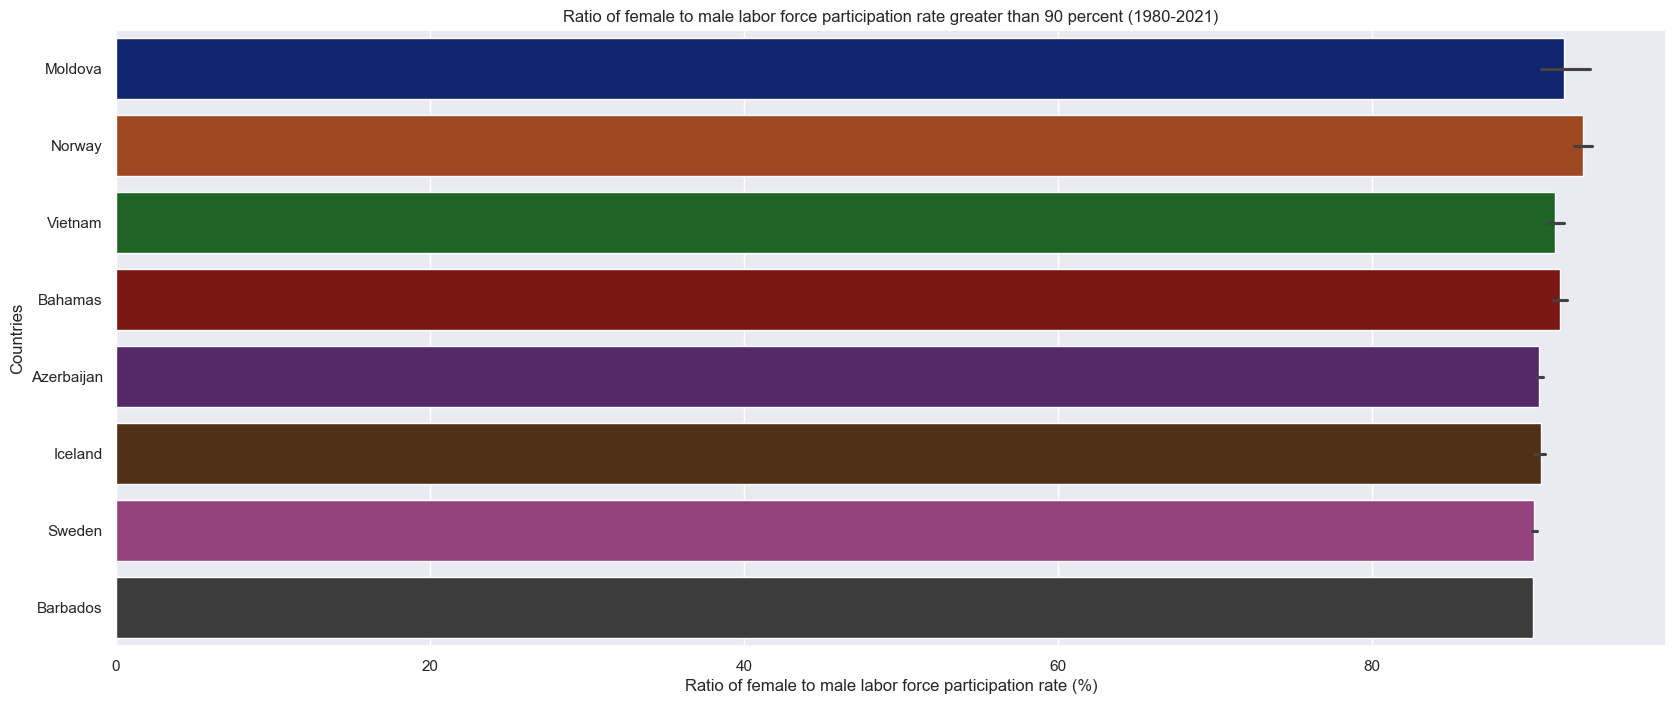

In [16]:
# The countries labor force participation female to male ratio is the most
# Moldova, Norway and Vietnam has the most amount
plt.figure(figsize=(20,8))
plt.title('Ratio of female to male labor force participation rate greater than 90 percent (1980-2021)')
plt.xlabel('Ratio of female to male labor force participation rate (%)')
plt.ylabel('Countries')
sns.barplot(data=df_ratio_labor.query('ratio_of_f_to_m_labor_force_participation_rate > 90').sort_values(by = ['ratio_of_f_to_m_labor_force_participation_rate'],ascending=False), y="Entity", x="ratio_of_f_to_m_labor_force_participation_rate",palette='dark'
            ,orient='h'
            
)
plt.show()

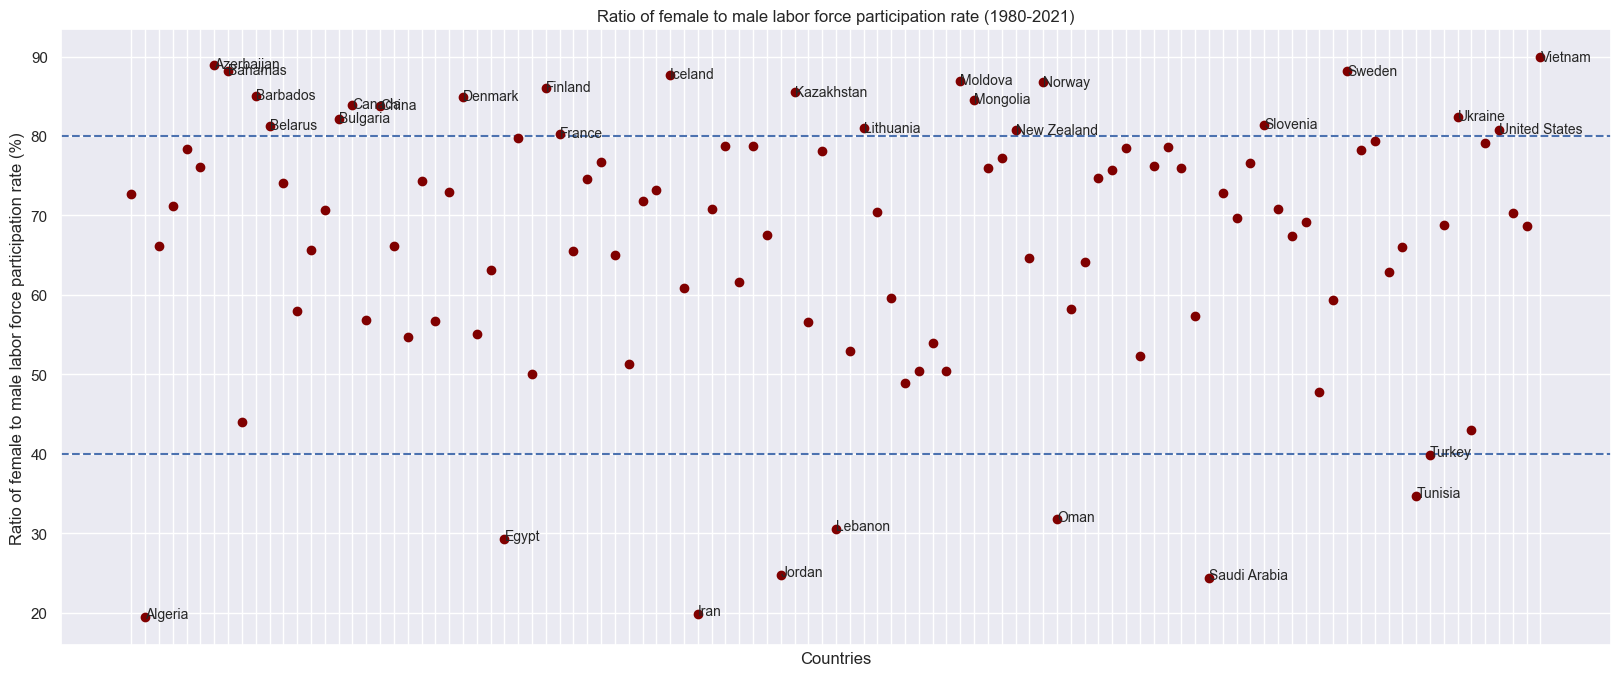

In [17]:
plt.figure(figsize=(20,8))
plt.title('Ratio of female to male labor force participation rate (1980-2021)')
plt.ylabel('Ratio of female to male labor force participation rate (%)')
plt.xlabel('Countries')
plt.tick_params(axis='both', which='both', labelbottom=False, bottom=False)
plt.axhline(y=40, color='b', linestyle='--')
plt.axhline(y=80, color='b', linestyle='--')

for i in range(len(df_ratio_labor[['Entity','ratio_of_f_to_m_labor_force_participation_rate']].groupby('Entity').mean())):
    x = df_ratio_labor[['Entity','ratio_of_f_to_m_labor_force_participation_rate']].groupby(by='Entity').mean().iloc[i].name
    y = df_ratio_labor[['Entity','ratio_of_f_to_m_labor_force_participation_rate']].groupby(by='Entity').mean().iloc[i].values[0]
    plt.plot(x, y, "o", color="maroon")
    if df_ratio_labor[['Entity','ratio_of_f_to_m_labor_force_participation_rate']].groupby(by='Entity').mean().iloc[i].values[0] >= 80 or \
    df_ratio_labor[['Entity','ratio_of_f_to_m_labor_force_participation_rate']].groupby(by='Entity').mean().iloc[i].values[0] <= 40 :
        plt.text(x, y * (1 - 0.005), df_ratio_labor[['Entity','ratio_of_f_to_m_labor_force_participation_rate']].groupby(by='Entity').mean().iloc[i].name, fontsize=10)
plt.show()

<Axes: title={'center': 'Ratio of female to male labor force participation rate In Different Countries (1990-2021)'}, xlabel='Year', ylabel='Ratio of female to male labor force participation rate (%)'>

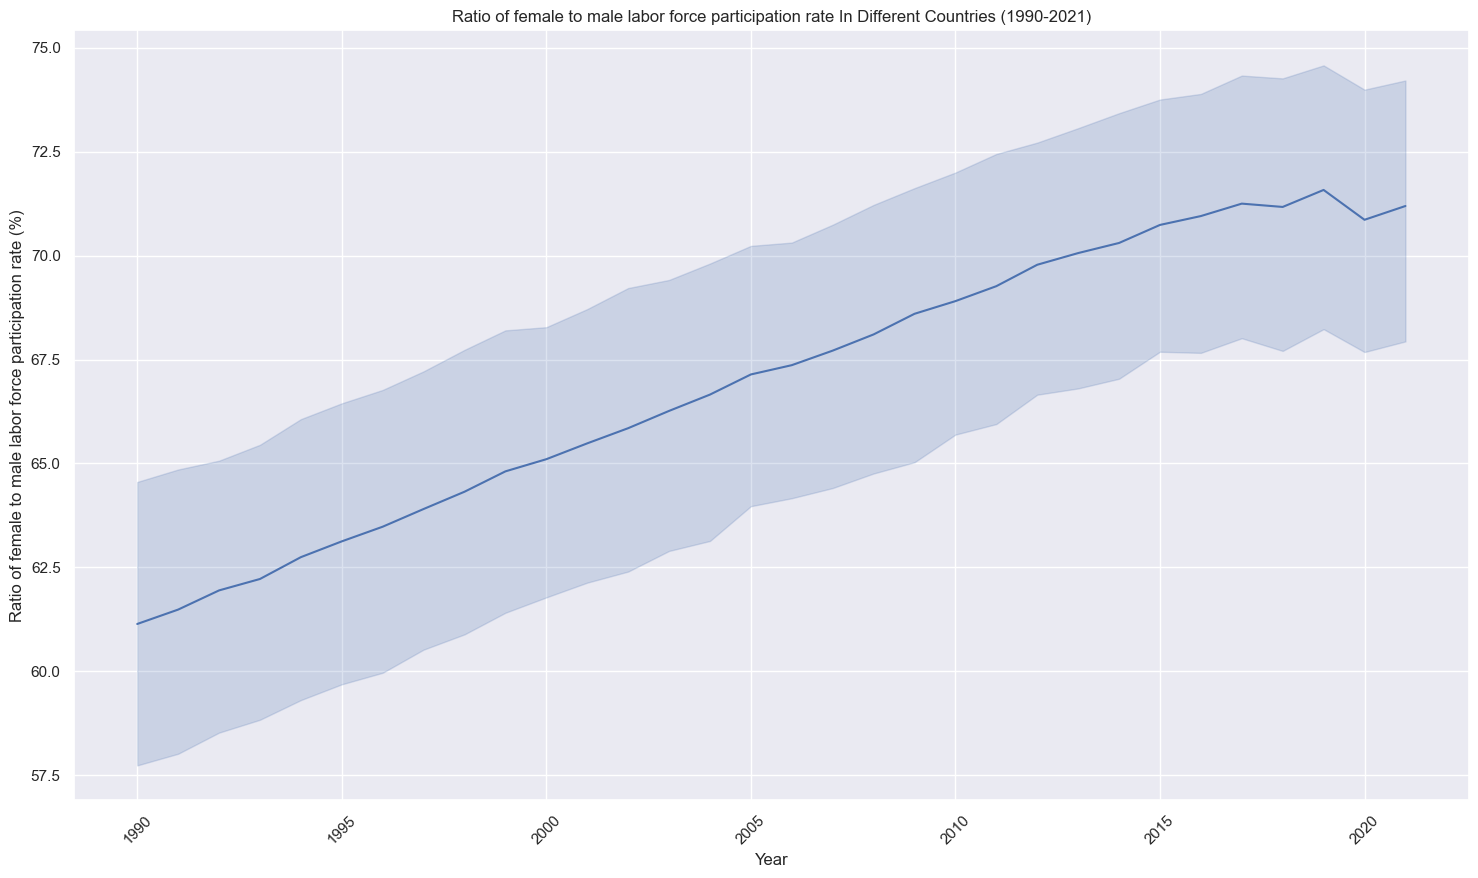

In [18]:
# In 2019-2020 rates dropped a little
# Probably because of COVID-19
# In between 1990-2020 female to male ratio is between 60-72 percent.
# For every 100 men 60 to 72 woman employed or looking for a job
# The ratio increased with time
# It is clear male labor force is greater than female labor force
plt.figure(figsize=(18,10))
plt.title('Ratio of female to male labor force participation rate In Different Countries (1990-2021)')
plt.ylabel('Ratio of female to male labor force participation rate (%)')
plt.xlabel('Year')
plt.xticks(rotation=45)
sns.lineplot(data=df_ratio_labor,y="ratio_of_f_to_m_labor_force_participation_rate", x="Year")

<Axes: title={'center': 'Ratio of female to male labor force participation rate In Turkey (1990-2021)'}, xlabel='Year', ylabel='Ratio of female to male labor force participation rate (%)'>

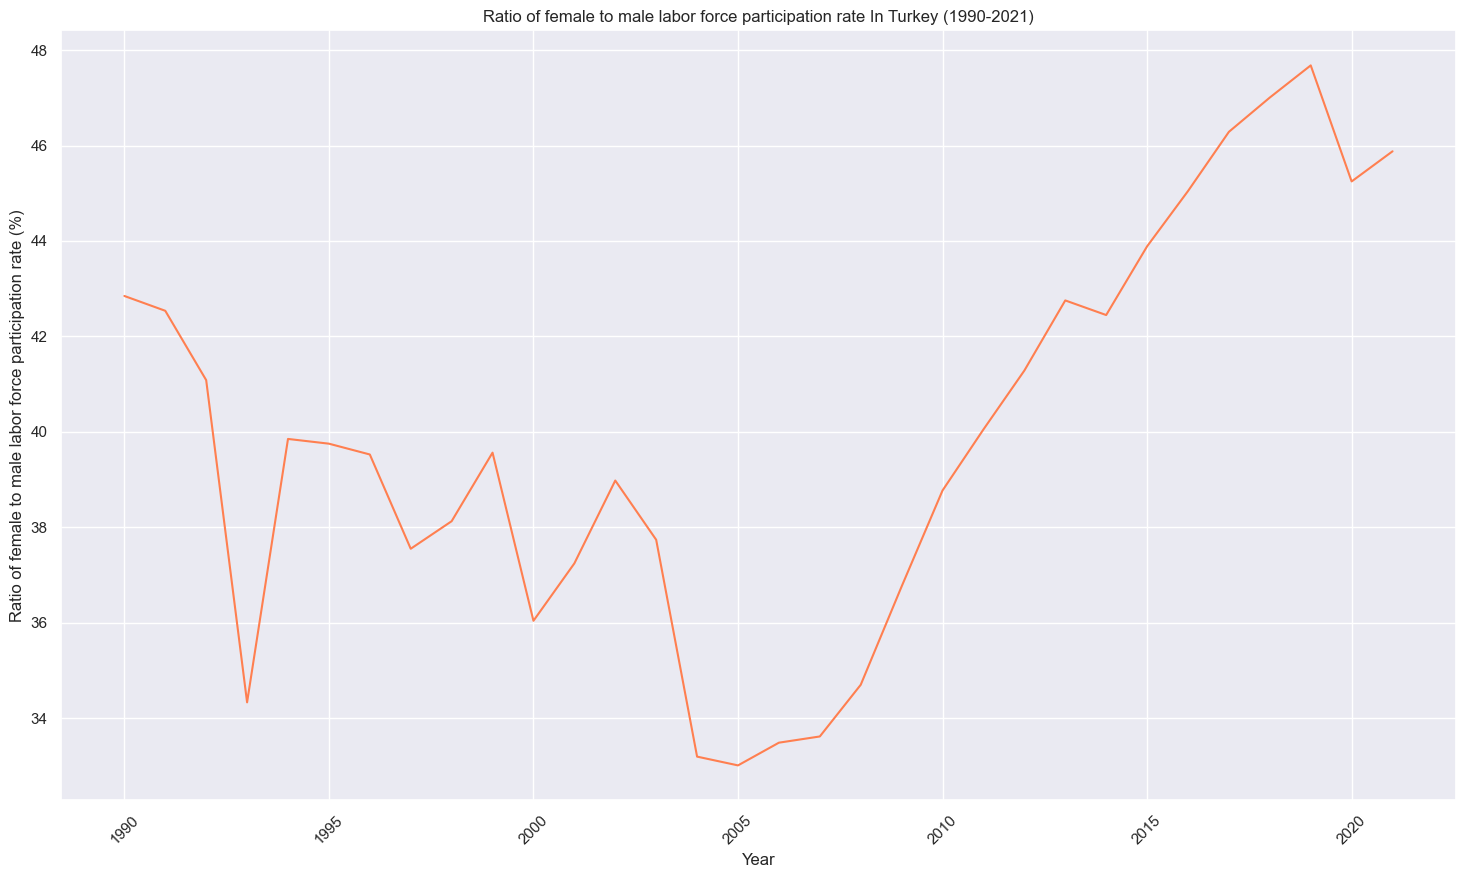

In [19]:
# We can say Turkey is below average with female labor participition compare the male
# After 2005 there is a clear increase
# Agan there is a little drop in 2019 due to COVID

plt.figure(figsize=(18,10))
plt.title('Ratio of female to male labor force participation rate In Turkey (1990-2021)')
plt.ylabel('Ratio of female to male labor force participation rate (%)')
plt.xlabel('Year')
plt.xticks(rotation=45)
sns.lineplot(data=df_ratio_labor.query('Entity ==  "Turkey"'),y="ratio_of_f_to_m_labor_force_participation_rate", x="Year",
             color='coral')


In [20]:
# I changed the column name at the beggining for simplicity 
# We can see every year's labour force participation rate data as columns
# We want to deconstruct that add  columns as year and participation rate
df_labor_male.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 37 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ISO3             195 non-null    object 
 1   Country          195 non-null    object 
 2   Continent        195 non-null    object 
 3   Hemisphere       195 non-null    object 
 4   HDI Rank (2021)  191 non-null    float64
 5   (1990)           180 non-null    float64
 6   (1991)           180 non-null    float64
 7   (1992)           180 non-null    float64
 8   (1993)           180 non-null    float64
 9   (1994)           180 non-null    float64
 10  (1995)           180 non-null    float64
 11  (1996)           180 non-null    float64
 12  (1997)           180 non-null    float64
 13  (1998)           180 non-null    float64
 14  (1999)           180 non-null    float64
 15  (2000)           180 non-null    float64
 16  (2001)           180 non-null    float64
 17  (2002)          

In [21]:
# We can see it has same columns as the male data
# We want to merge male and female data
df_labor_female.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 37 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ISO3             195 non-null    object 
 1   Country          195 non-null    object 
 2   Continent        195 non-null    object 
 3   Hemisphere       195 non-null    object 
 4   HDI Rank (2021)  191 non-null    float64
 5   (1990)           180 non-null    float64
 6   (1991)           180 non-null    float64
 7   (1992)           180 non-null    float64
 8   (1993)           180 non-null    float64
 9   (1994)           180 non-null    float64
 10  (1995)           180 non-null    float64
 11  (1996)           180 non-null    float64
 12  (1997)           180 non-null    float64
 13  (1998)           180 non-null    float64
 14  (1999)           180 non-null    float64
 15  (2000)           180 non-null    float64
 16  (2001)           180 non-null    float64
 17  (2002)          

In [22]:
# For changin the structure of datasets we perform melting

# Defining the columns that we want to keep as identifiers
id_columns = ['ISO3', 'Country', 'Continent', 'Hemisphere', 'HDI Rank (2021)']

# Perform melting/unpivoting
df_labor_male_melted = pd.melt(df_labor_male, 
                    id_vars=id_columns, 
                    var_name='Year', 
                    value_name='Labour force participation rate')

df_labor_female_melted = pd.melt(df_labor_female, 
                    id_vars=id_columns, 
                    var_name='Year', 
                    value_name='Labour force participation rate')



In [23]:
# Extract the year from the Year column and convert it to integer
df_labor_male_melted['Year'] = df_labor_male_melted['Year'].str.extract(r"(\d+)").astype(int)
df_labor_female_melted['Year'] = df_labor_female_melted['Year'].str.extract(r"(\d+)").astype(int)

In [24]:
# Before the merge we want to know the data is from male or femlae
# Adding gender as a column
df_labor_female_melted['Gender'] = 'F'
df_labor_male_melted['Gender'] = 'M'


In [25]:
# Merge the datasets
df_labor_force_merged = pd.concat([df_labor_female_melted,df_labor_male_melted])

In [26]:
# Reorder the columns
df_labor_force_merged = df_labor_force_merged[['ISO3', 'Country', 'Year','Continent', 'Hemisphere', 'HDI Rank (2021)', 'Labour force participation rate','Gender']]

# Sort the dataframe by country and year
df_labor_force_merged = df_labor_force_merged.sort_values(by=['Country', 'Year'])


# Change column names
df_labor_force_merged.columns = column_name_replace_space(df_labor_force_merged.columns)

# Reset index
df_labor_force_merged = df_labor_force_merged.reset_index(drop=True)


In [27]:
df_labor_force = constrain_dataset(df_labor_force_merged,selected_countries)


In [28]:
df_labor_force.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7040 entries, 0 to 7039
Data columns (total 8 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ISO3                             7040 non-null   object 
 1   Country                          7040 non-null   object 
 2   Year                             7040 non-null   int32  
 3   Continent                        7040 non-null   object 
 4   Hemisphere                       7040 non-null   object 
 5   HDI_Rank_(2021)                  7040 non-null   float64
 6   Labour_force_participation_rate  6464 non-null   float64
 7   Gender                           7040 non-null   object 
dtypes: float64(2), int32(1), object(5)
memory usage: 412.6+ KB


In [29]:
df_labor_force.head()

,ISO3,Country,Year,Continent,Hemisphere,HDI_Rank_(2021),Labour_force_participation_rate,Gender
0,ALB,Albania,1990,Europe,Northern Hemisphere,67.0,51.364,F
1,ALB,Albania,1990,Europe,Northern Hemisphere,67.0,72.510,M
2,ALB,Albania,1991,Europe,Northern Hemisphere,67.0,54.727,F
3,ALB,Albania,1991,Europe,Northern Hemisphere,67.0,75.143,M
4,ALB,Albania,1992,Europe,Northern Hemisphere,67.0,55.608,F


In [30]:
# There are missing values 
is_null(df_labor_force)

Labour_force_participation_rate    576
ISO3                                 0
Country                              0
Year                                 0
Continent                            0
Hemisphere                           0
HDI_Rank_(2021)                      0
Gender                               0
dtype: int64

In [31]:
# Looking which countries has the null values
df_labor_force[df_labor_force['Labour_force_participation_rate'].isnull()]['Country'].unique()

array(['Andorra', 'Antigua and Barbuda', 'Dominica', 'Grenada',
       'Liechtenstein', 'Palau', 'Saint Kitts and Nevis', 'San Marino',
       'Seychelles'], dtype=object)

In [32]:
# For filling null values we are gonna use that continent mean that year and for that gender
# Grouping labour force by continent, year and gender
df_labor_force_by_continent = df_labor_force[['Continent','Gender','Year','Labour_force_participation_rate']].groupby(['Continent','Year','Gender'],as_index=False).mean()

In [33]:
# Using this variables for null labour force participation values
df_labor_force_by_continent.sample(10)

,Continent,Year,Gender,Labour_force_participation_rate
190,Asia,2021,F,45.447400
96,America,2006,F,51.246773
317,Oceania,2020,M,66.114800
200,Europe,1994,F,48.858676
120,America,2018,F,53.992773
185,Asia,2018,M,74.518500
214,Europe,2001,F,49.430351
261,Oceania,1992,M,71.585800
87,America,2001,M,76.345682
184,Asia,2018,F,46.643867


In [34]:
# continent, year and gender values of the null in the dataframe 
df_labor_force[df_labor_force['Labour_force_participation_rate'].isnull()][['Continent','Year','Gender']]

,Continent,Year,Gender
128,Europe,1990,F
129,Europe,1990,M
130,Europe,1991,F
131,Europe,1991,M
132,Europe,1992,F
...,...,...,...
5627,Africa,2019,M
5628,Africa,2020,F
5629,Africa,2020,M
5630,Africa,2021,F


In [35]:
# Filling null labor force participation values with the function
# Null values filled with their continent mean values for that year and gender
fill_labor_force_participation(df_labor_force,df_labor_force_by_continent)

In [36]:
is_null(df_labor_force)

ISO3                               0
Country                            0
Year                               0
Continent                          0
Hemisphere                         0
HDI_Rank_(2021)                    0
Labour_force_participation_rate    0
Gender                             0
dtype: int64

In [37]:
df_labor_force.describe()

,Year,HDI_Rank_(2021),Labour_force_participation_rate
count,7040.000000,7040.000000,7040.000000
mean,2005.500000,56.809091,59.095081
std,9.233748,32.854757,15.711770
min,1990.000000,1.000000,10.000000
25%,1997.750000,28.000000,48.986000
50%,2005.500000,57.500000,61.105500
75%,2013.250000,85.000000,71.196500
max,2021.000000,114.000000,96.196000


C:\Users\HP\AppData\Local\Temp\ipykernel_15452\2738261229.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_labor_force, x='Labour_force_participation_rate', y='Gender' ,orient='h',palette='dark', order=['M','F'])


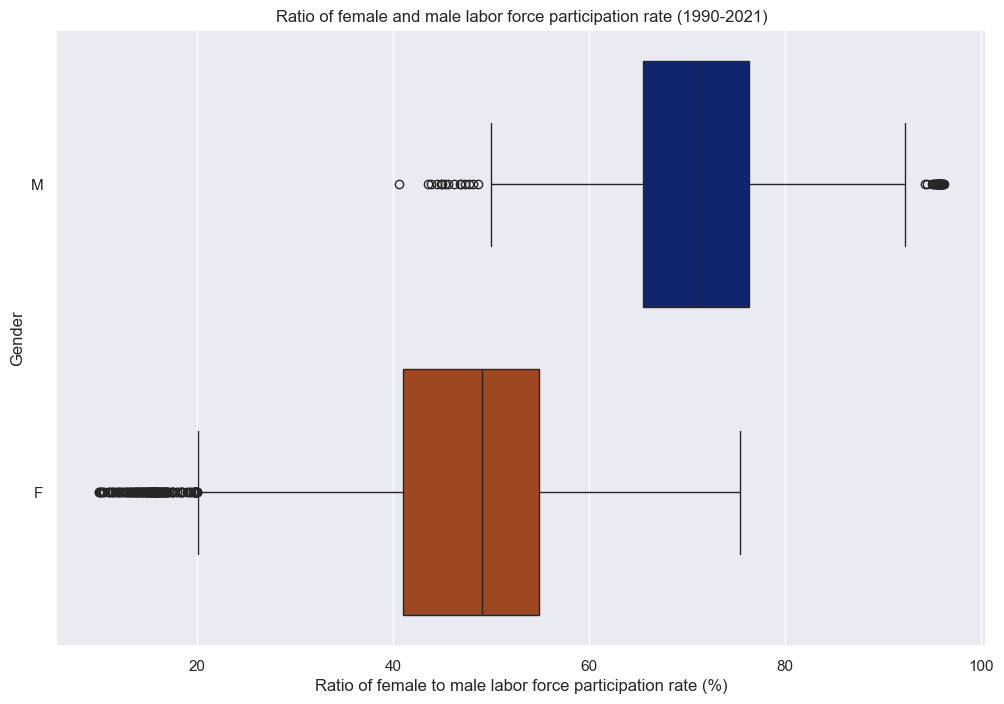

In [38]:
#We can see there is a significant difference between male and female participation
plt.figure(figsize=(12,8))
plt.title('Ratio of female and male labor force participation rate (1990-2021)')
plt.xlabel('Ratio of female to male labor force participation rate (%)')
sns.set_theme(style="darkgrid")
sns.boxplot(data=df_labor_force, x='Labour_force_participation_rate', y='Gender' ,orient='h',palette='dark', order=['M','F'])
plt.show()

<Axes: title={'center': 'Labour force_participation rate In Different Countries Female-Male (1990-2021)'}, xlabel='Year', ylabel='Ratio of female to male labor force participation rate (%)'>

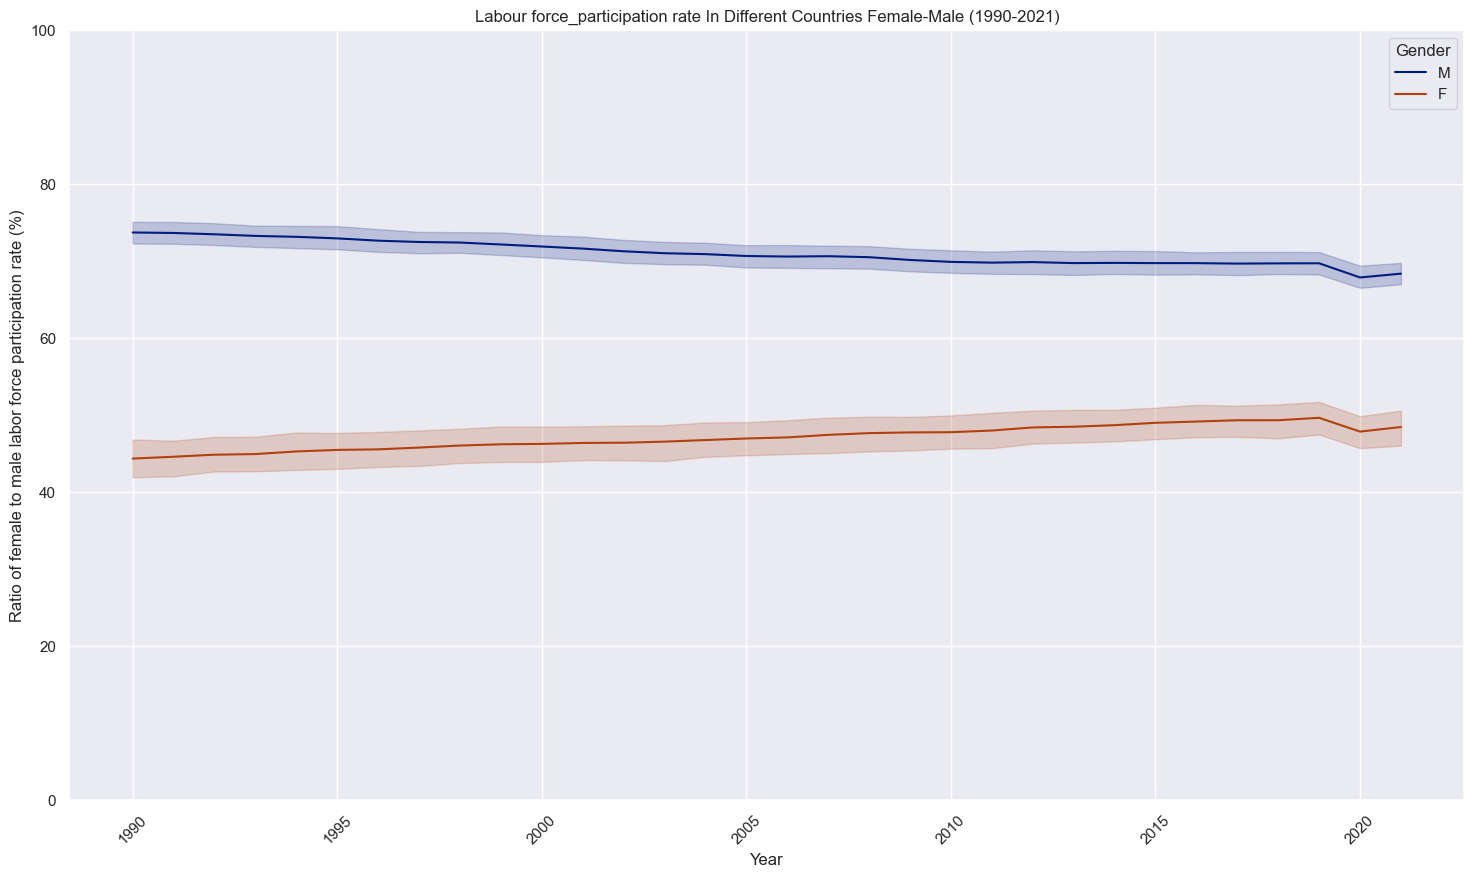

In [39]:
# There is a clear difference between male and female labor participation rates between the years 1990-2021
# The difference has become smaller withing the years
plt.figure(figsize=(18,10))
plt.title('Labour force_participation rate In Different Countries Female-Male (1990-2021)')
plt.ylabel('Ratio of female to male labor force participation rate (%)')
plt.ylim(0,100)
plt.xlabel('Year')
plt.xticks(rotation=45)
sns.lineplot(data=df_labor_force,y="Labour_force_participation_rate", x="Year", hue='Gender',palette='dark',hue_order=['M','F'])

<Axes: title={'center': 'Ratio of female to male labor force participation rate In Turkey (1990-2021)'}, xlabel='Year', ylabel='Ratio of female to male labor force participation rate (%)'>

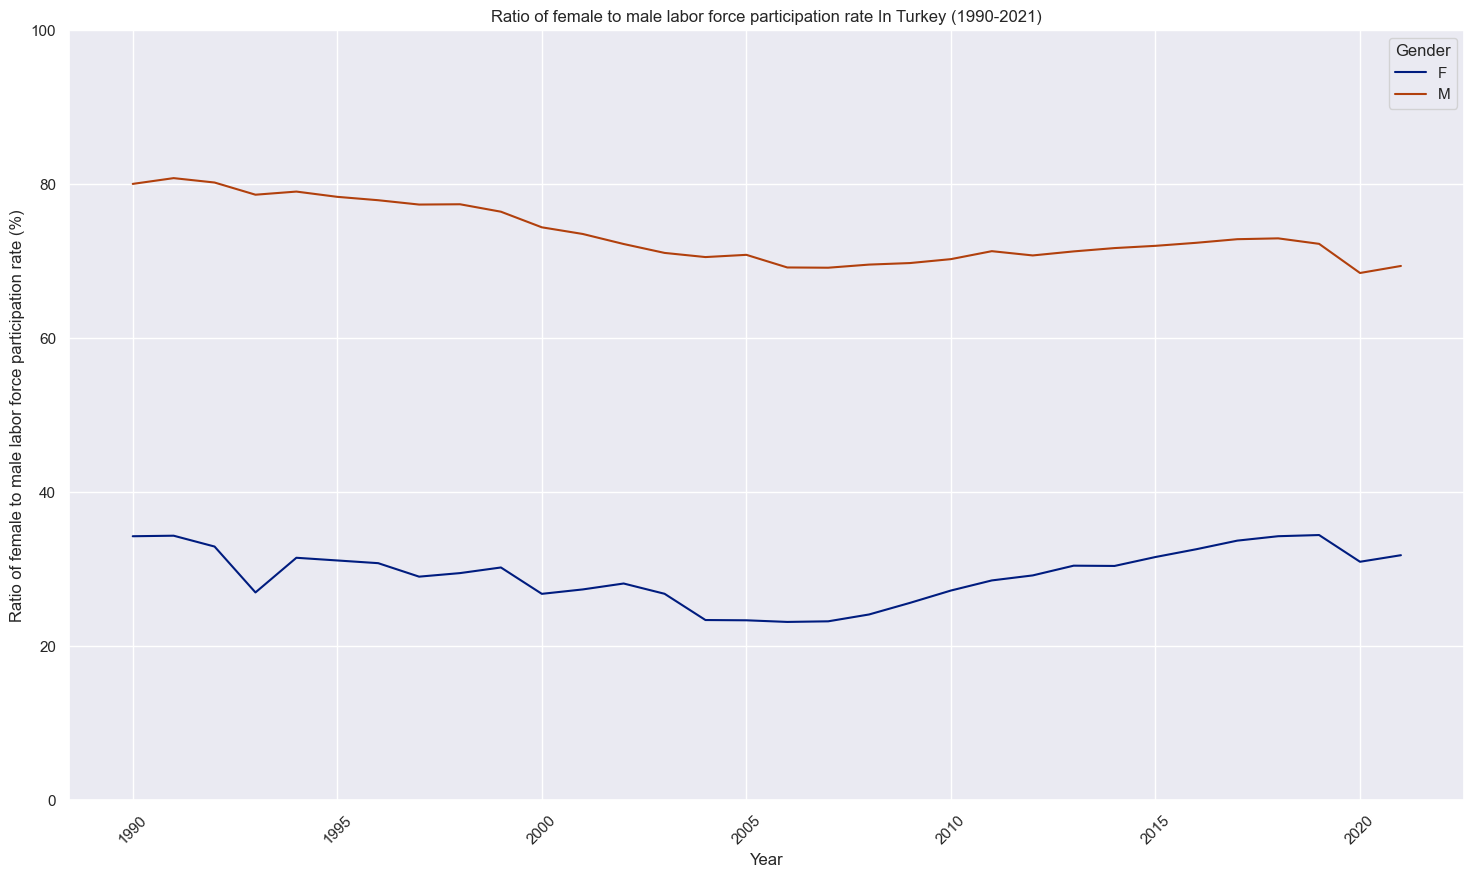

In [40]:
# The difference between even bigger in Turkey
# We can say Turkey is below average with female labor participition compare the male
plt.figure(figsize=(18,10))
plt.title('Ratio of female to male labor force participation rate In Turkey (1990-2021)')
plt.ylabel('Ratio of female to male labor force participation rate (%)')
plt.xlabel('Year')
plt.ylim(0,100)
plt.xticks(rotation=45)
sns.lineplot(data=df_labor_force.query('Country ==  "Turkey"'),y="Labour_force_participation_rate", x="Year",hue='Gender',
             palette='dark')


In [41]:
# Saving labor force dataframe for to use filling missing values of fertility- labor force data
df_labor_force.to_csv('data/labor_force.csv',index=False)

### 2. Female Employment 
- The female employment-to-population ratio is a measure that expresses the proportion of women who are employed relative to the total female population of working age. 
- It is typically calculated by dividing the number of employed women by the total number of women in the working-age population (usually defined as those aged 15 to 64), and then multiplying the result by 100 to express it as a percentage.
- A higher ratio generally indicates a greater degree of economic participation among women

In [42]:
df_female_employmennt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2652 entries, 0 to 2651
Data columns (total 4 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Entity                                    2652 non-null   object 
 1   Code                                      2652 non-null   object 
 2   Year                                      2652 non-null   int64  
 3   ratio_of_female_employment_to_population  2652 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 83.0+ KB


In [43]:
df_female_employmennt.head()

,Entity,Code,Year,ratio_of_female_employment_to_population
0,Albania,ALB,2002,43.67
1,Albania,ALB,2004,39.00
2,Albania,ALB,2005,39.61
3,Albania,ALB,2007,30.69
4,Albania,ALB,2008,39.39


In [44]:
# Checking null values
# No null values
is_null(df_female_employmennt)

Entity                                      0
Code                                        0
Year                                        0
ratio_of_female_employment_to_population    0
dtype: int64

In [45]:
# Checking outliers
# No outliers
get_outliers(df_female_employmennt,'ratio_of_female_employment_to_population')

Series([], Name: ratio_of_female_employment_to_population, dtype: float64)

In [46]:
# Year between 1980-2021
# Most of the countries more than half of the women population is not employed 
df_female_employmennt.describe()

,Year,ratio_of_female_employment_to_population
count,2652.000000,2652.000000
mean,2004.611991,44.633925
std,10.914705,12.713533
min,1980.000000,3.800000
25%,1997.000000,37.657500
50%,2006.000000,46.265000
75%,2014.000000,52.422500
max,2021.000000,85.000000


<Axes: title={'center': 'Ratio of Female Employment to Population (1980-2021)'}, xlabel='Ratio of Female Employment to Population (%)'>

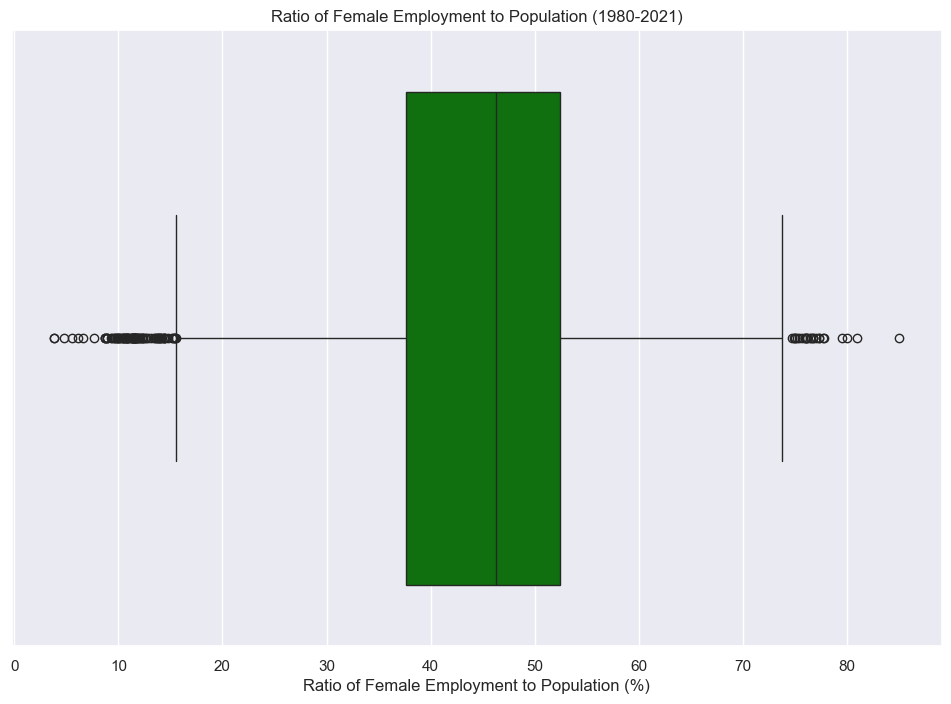

In [47]:
# Most of the data has 40-55 ratio
# the proportion of women who are employed relative to the total female population of working age
# Half of the women in working age is not employed in the countries HDI rank is high or very high
plt.figure(figsize=(12,8))
plt.title('Ratio of Female Employment to Population (1980-2021)')
plt.xlabel('Ratio of Female Employment to Population (%)')
sns.set_theme(style="darkgrid")
sns.boxplot(data=df_female_employmennt, x='ratio_of_female_employment_to_population',orient='h',color='green')

<Axes: title={'center': 'Ratio of female employment to population (1980-2021)'}, xlabel='Year', ylabel='ratio_of_female_employment_to_population'>

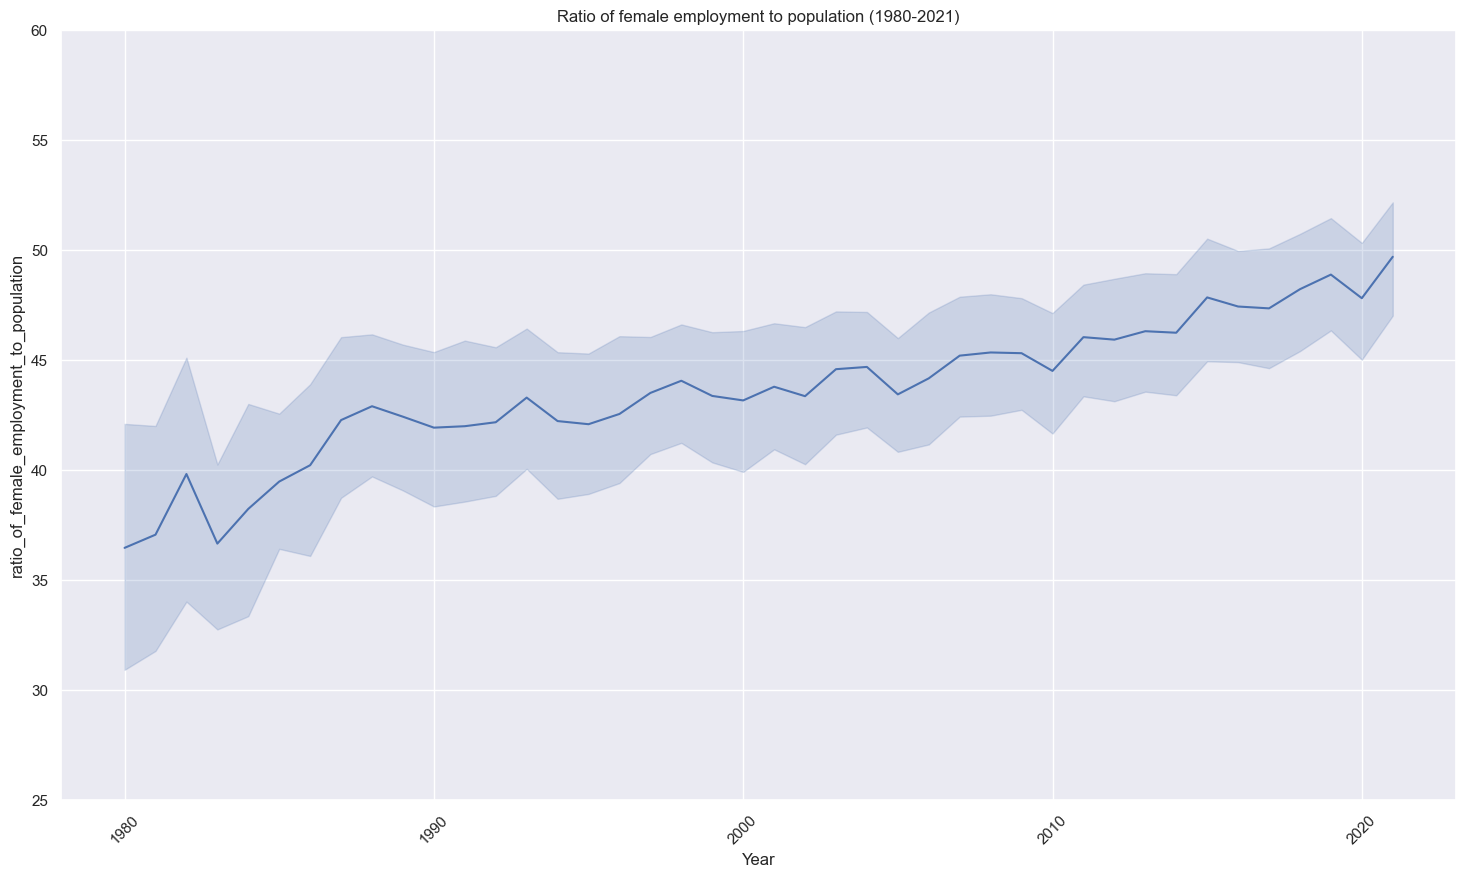

In [48]:
# Even the employment ratio increased with years it is still only half of the working age female population
plt.figure(figsize=(18,10))
plt.title('Ratio of female employment to population (1980-2021)')
plt.xlabel('Ratio of female employment to population (%)')
plt.xlabel('Year')
plt.ylim(25,60)
plt.xticks(rotation=45)
sns.lineplot(y=df_female_employmennt["ratio_of_female_employment_to_population"], x=df_female_employmennt["Year"])

C:\Users\HP\AppData\Local\Temp\ipykernel_15452\1470899945.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_female_employmennt.query('ratio_of_female_employment_to_population < 25 ').sort_values(by = ['ratio_of_female_employment_to_population'],ascending=True),


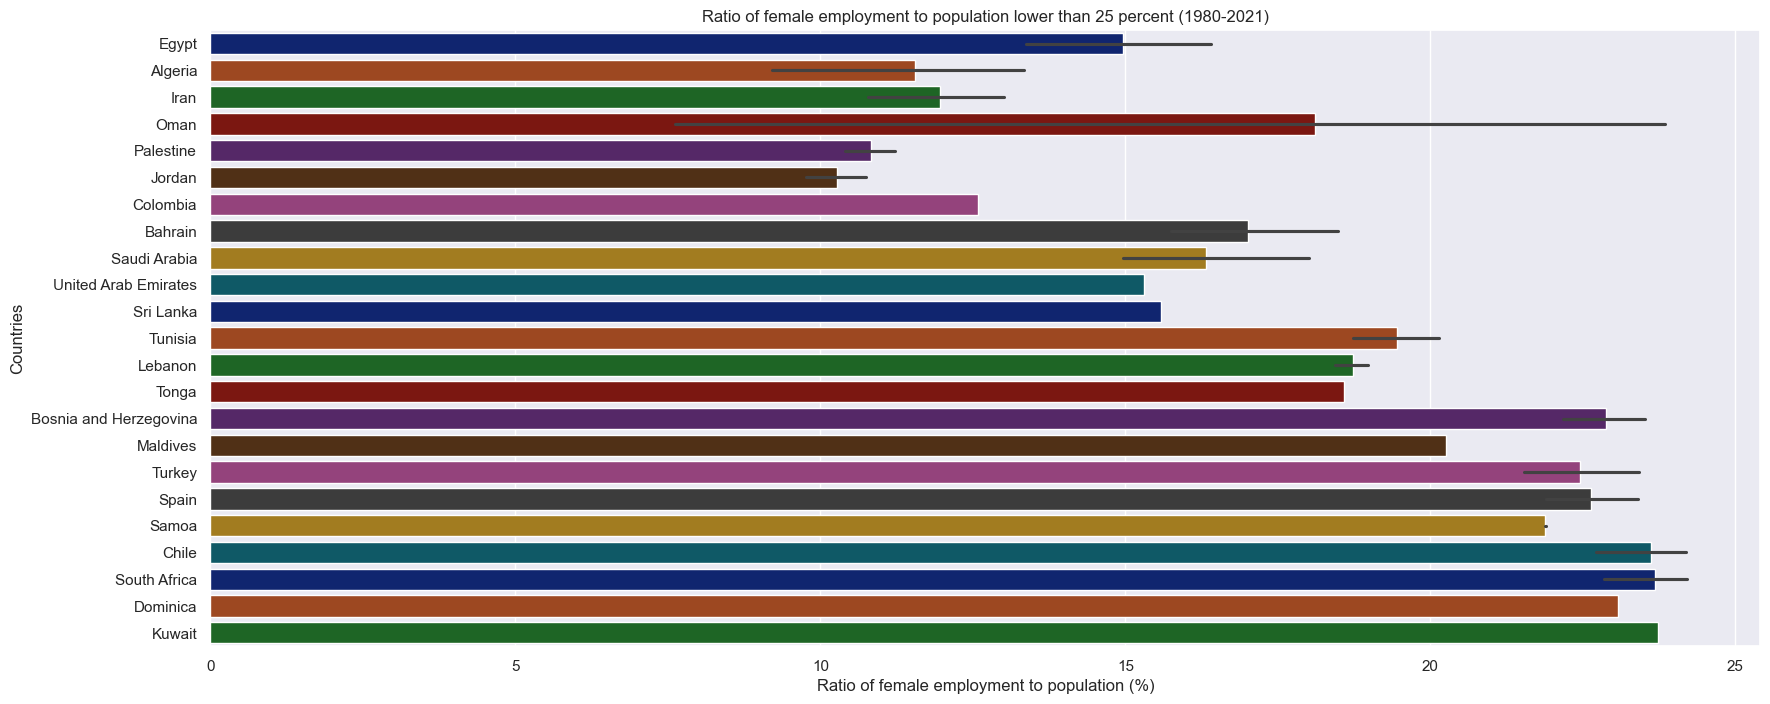

In [49]:
# The countries ratio of female employment to population is the least
# Turkey is one of them
# Iran, Algeria and Egypt has the least amount
plt.figure(figsize=(20,8))
plt.title('Ratio of female employment to population lower than 25 percent (1980-2021)')
plt.xlabel('Ratio of female employment to population (%)')
plt.ylabel('Countries')
sns.barplot(data=df_female_employmennt.query('ratio_of_female_employment_to_population < 25 ').sort_values(by = ['ratio_of_female_employment_to_population'],ascending=True),
             y="Entity",
            x="ratio_of_female_employment_to_population",
            palette='dark'
            ,orient='h'
            
)
plt.show() 

C:\Users\HP\AppData\Local\Temp\ipykernel_15452\2678586.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_female_employmennt.query('ratio_of_female_employment_to_population > 60 ').sort_values(by = ['ratio_of_female_employment_to_population'],ascending=False),


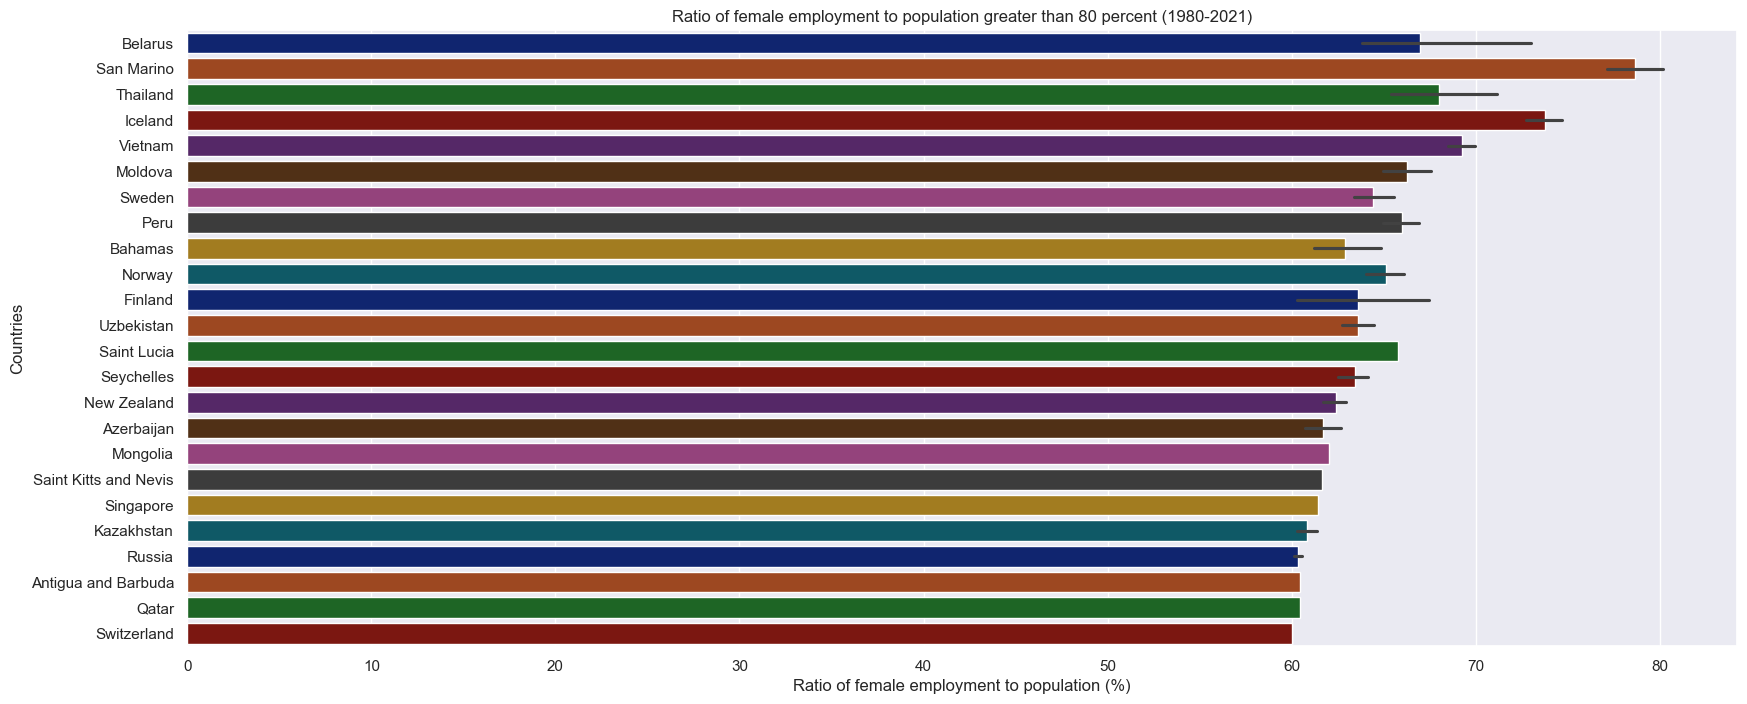

In [50]:
# The countries ratio of female employment to population is the most
# Belarus, San Marino and Thailand has the least amount
plt.figure(figsize=(20,8))
plt.title('Ratio of female employment to population greater than 80 percent (1980-2021)')
plt.xlabel('Ratio of female employment to population (%)')
plt.ylabel('Countries')
sns.barplot(data=df_female_employmennt.query('ratio_of_female_employment_to_population > 60 ').sort_values(by = ['ratio_of_female_employment_to_population'],ascending=False),
             y="Entity",
            x="ratio_of_female_employment_to_population",
            palette='dark'
            ,orient='h'
            
)
plt.show()

<Axes: title={'center': 'Ratio of female employment to population in Turkey (1980-2021)'}, xlabel='Year', ylabel='ratio_of_female_employment_to_population'>

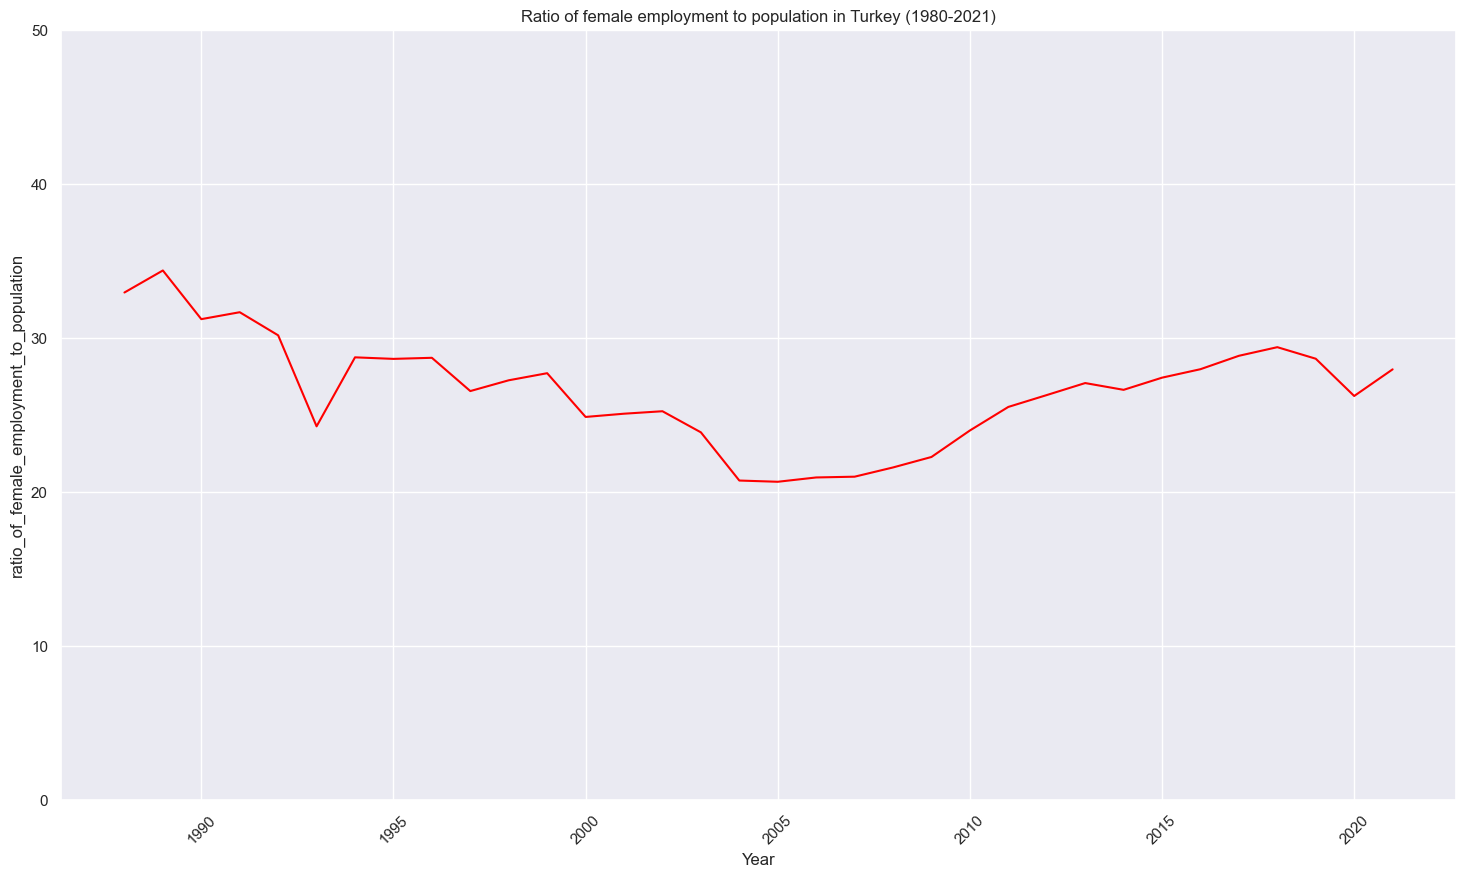

In [51]:
# The ratio even lower in Turkey (between 25-30 percent)
# We can say Turkey is below average with ratio of female employment to population
plt.figure(figsize=(18,10))
plt.title('Ratio of female employment to population in Turkey (1980-2021)')
plt.xlabel('Ratio of female employment to population (%)')
plt.xlabel('Year')
plt.ylim(0,50)
plt.xticks(rotation=45)
sns.lineplot(data=df_female_employmennt.query('Entity ==  "Turkey"'),y="ratio_of_female_employment_to_population", x="Year",
             color='red')

### 3. Share of Male Female Employment
- The proportion of total employment within a specific sector, occupation, or workforce that is accounted for by either males or females. 
- It represents the percentage of individuals of a particular gender relative to the total number of individuals employed in a given context.
- This metric provides insights into patterns of gender representation and participation in the labor market, as well as potential disparities or inequalities in employment opportunities and outcomes between genders.

In [52]:
df_share_of_male_female_employment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 7 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Entity                             4746 non-null   object 
 1   Code                               4746 non-null   object 
 2   Year                               4746 non-null   int64  
 3   employement_percentage_male        3016 non-null   float64
 4   employement_percentage_female      3016 non-null   float64
 5   Population (historical estimates)  4746 non-null   float64
 6   Continent                          113 non-null    object 
dtypes: float64(3), int64(1), object(3)
memory usage: 259.7+ KB


In [53]:
# Dropping Continent column because it mostly null and we don't use it
df_share_of_male_female_employment = df_share_of_male_female_employment.reset_index(drop=True).drop(columns=['Continent'])

In [54]:
df_share_of_male_female_employment.head()

,Entity,Code,Year,employement_percentage_male,employement_percentage_female,Population (historical estimates)
0,Albania,ALB,1991,15.26,6.77,3302087.0
1,Albania,ALB,1992,15.05,6.85,3303738.0
2,Albania,ALB,1993,15.35,6.91,3300715.0
3,Albania,ALB,1994,15.61,6.99,3294001.0
4,Albania,ALB,1995,15.97,7.10,3284370.0


In [55]:
is_null(df_share_of_male_female_employment)

employement_percentage_male          1730
employement_percentage_female        1730
Entity                                  0
Code                                    0
Year                                    0
Population (historical estimates)       0
dtype: int64

In [56]:
# Filling null values in the employment_percentage
# If the country has other data in years we fill with the average of the country
# If country has no data we get the that year average percentage
fill_employment_percentage(df_share_of_male_female_employment)

In [57]:
is_null(df_share_of_male_female_employment)

Entity                               0
Code                                 0
Year                                 0
employement_percentage_male          0
employement_percentage_female        0
Population (historical estimates)    0
dtype: int64

In [58]:
get_outliers(df_share_of_male_female_employment,'employement_percentage_male')

Series([], Name: employement_percentage_male, dtype: float64)

In [59]:
get_outliers(df_share_of_male_female_employment,'employement_percentage_female')

Series([], Name: employement_percentage_female, dtype: float64)

In [60]:
# Male employment percentage is mostly between 23-34
# Female employment percentage is mostly between 8-17
df_share_of_male_female_employment.describe()

,Year,employement_percentage_male,employement_percentage_female,Population (historical estimates)
count,4746.000000,4746.000000,4746.000000,4.746000e+03
mean,2000.500000,28.922377,14.255769,3.308125e+07
std,12.122196,7.957281,8.630559,1.233211e+08
min,1980.000000,7.490000,-2.120000,1.227900e+04
25%,1990.000000,23.370000,8.662500,1.353362e+06
50%,2000.500000,28.995000,12.360000,5.212998e+06
75%,2011.000000,34.167500,17.897500,2.170153e+07
max,2021.000000,67.400000,61.350000,1.425894e+09


<Axes: title={'center': 'Share of male female employment (1980-2016)'}, xlabel='Employment Percentage (%)'>

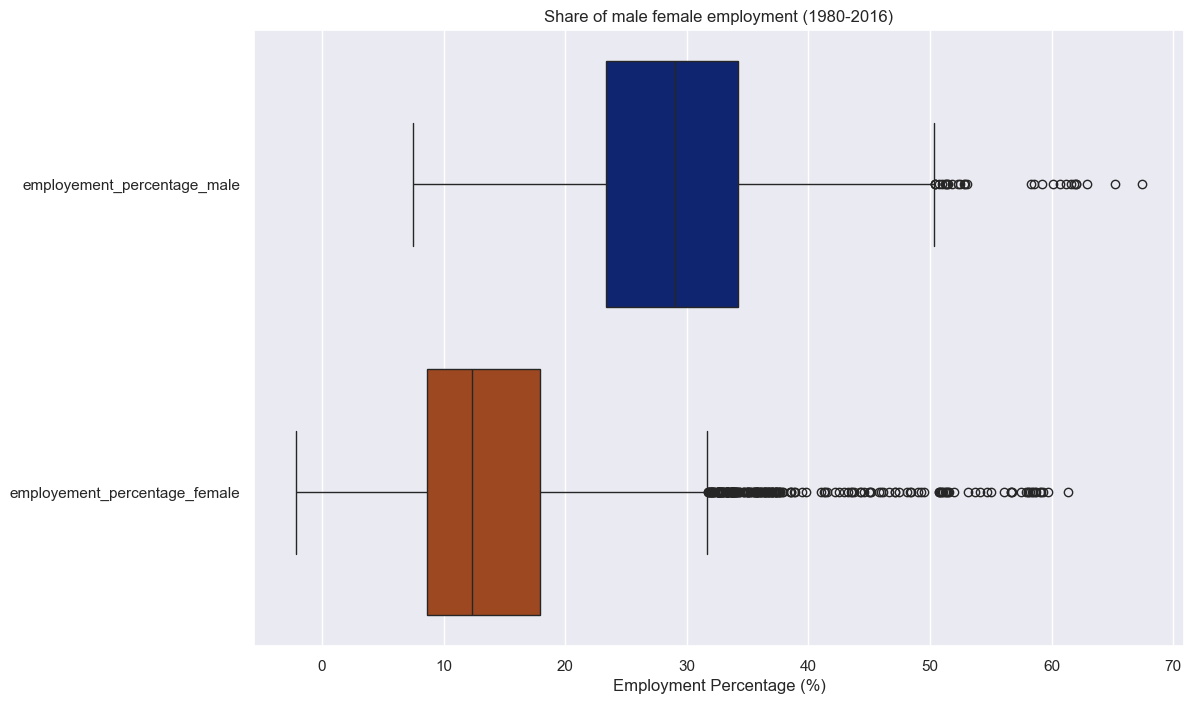

In [61]:
#Male employment percentage higher than female
plt.figure(figsize=(12,8))
plt.title('Share of male female employment (1980-2016)')
plt.xlabel('Employment Percentage (%)')
sns.set_theme(style="darkgrid")
sns.boxplot( data=df_share_of_male_female_employment[['employement_percentage_male','employement_percentage_female']],orient='h',palette='dark')

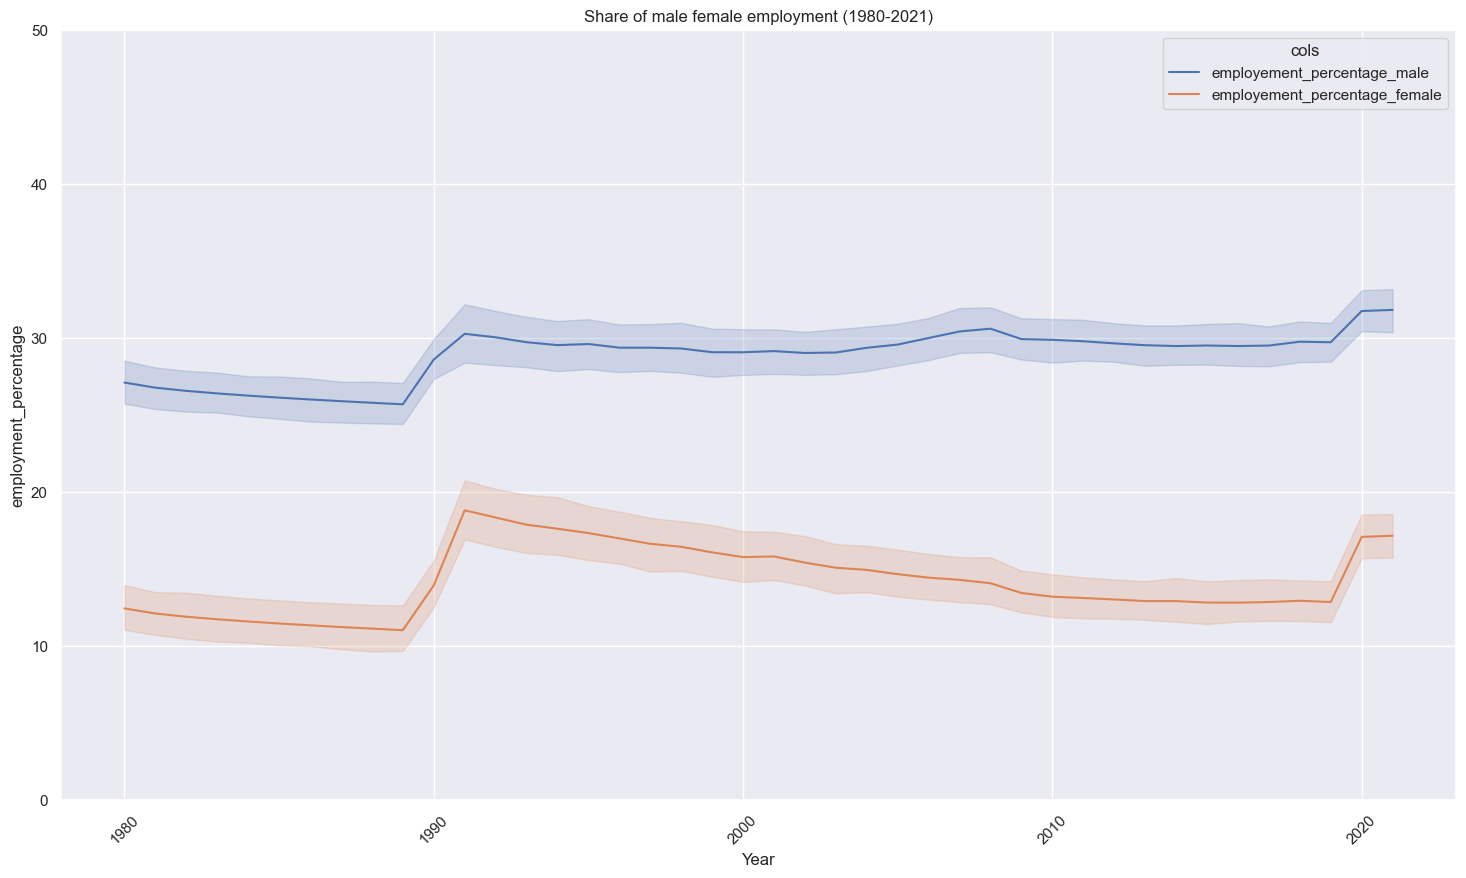

In [62]:
# There is a clear difference between women and men employment
# In 1990 there is a steep increase in women employment
# After 1990 women employment percentage lowered while man emloyment was approximately stayed the same until 2019
# Both men and women employment increased in 2019 (probably due to Covid) but women employment increased more than men
# But still women employment didn't reach the level of 1990
# The difference between employement didn't change linearly with time
plt.figure(figsize=(18,10))
plt.title('Share of male female employment (1980-2021)')
plt.xlabel('Share of male female employment (%)')
plt.xlabel('Year')
plt.ylim(0,50)
plt.xticks(rotation=45)
dfm = df_share_of_male_female_employment[['Year','employement_percentage_male','employement_percentage_female']].melt('Year', var_name='cols', value_name='employment_percentage')
sns.lineplot(x="Year", y="employment_percentage", hue='cols', data=dfm,color='Red')
plt.show()